***
<a id="coding_tutorial_3"></a>
## Accessing model layers

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

####  Load the pre-trained model¶



In this section, we aim to demonstrate accessing layer attributes within a model.

Let's get started by loading the VGG19 pre-trained model from the keras.applications library, which is a very deep network trained on more than a million images from the ImageNet database. The network is trained to classify images into 1000 object categories.

In [2]:
# Load the VGG19 model
from keras.applications.vgg16 import VGG16
vgg_model = VGG16()


In [3]:
# Get the inputs, layers and display the summary

vgg_input = vgg_model.input
vgg_layers = vgg_model.layers
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [4]:
vgg_input
len(vgg_layers)
print(vgg_layers[1].output)

Tensor("block1_conv1/Identity:0", shape=(None, 224, 224, 64), dtype=float32)


### Build a model to access the layer outputs

In [6]:
from tensorflow.keras.models import Model
import pydot
# Build a model that returns the layer outputs

layer_outputs = [layer.output for layer in vgg_layers]
features = Model(inputs=vgg_input, outputs=layer_outputs)

# Plot the model

tf.keras.utils.plot_model(features, 'vgg19.png', show_shapes=True)

# Test the model on a random input

random_input = np.random.random((1,224,224,3)).astype('float32')
extracted_features = features(random_input)

len(extracted_features)

23

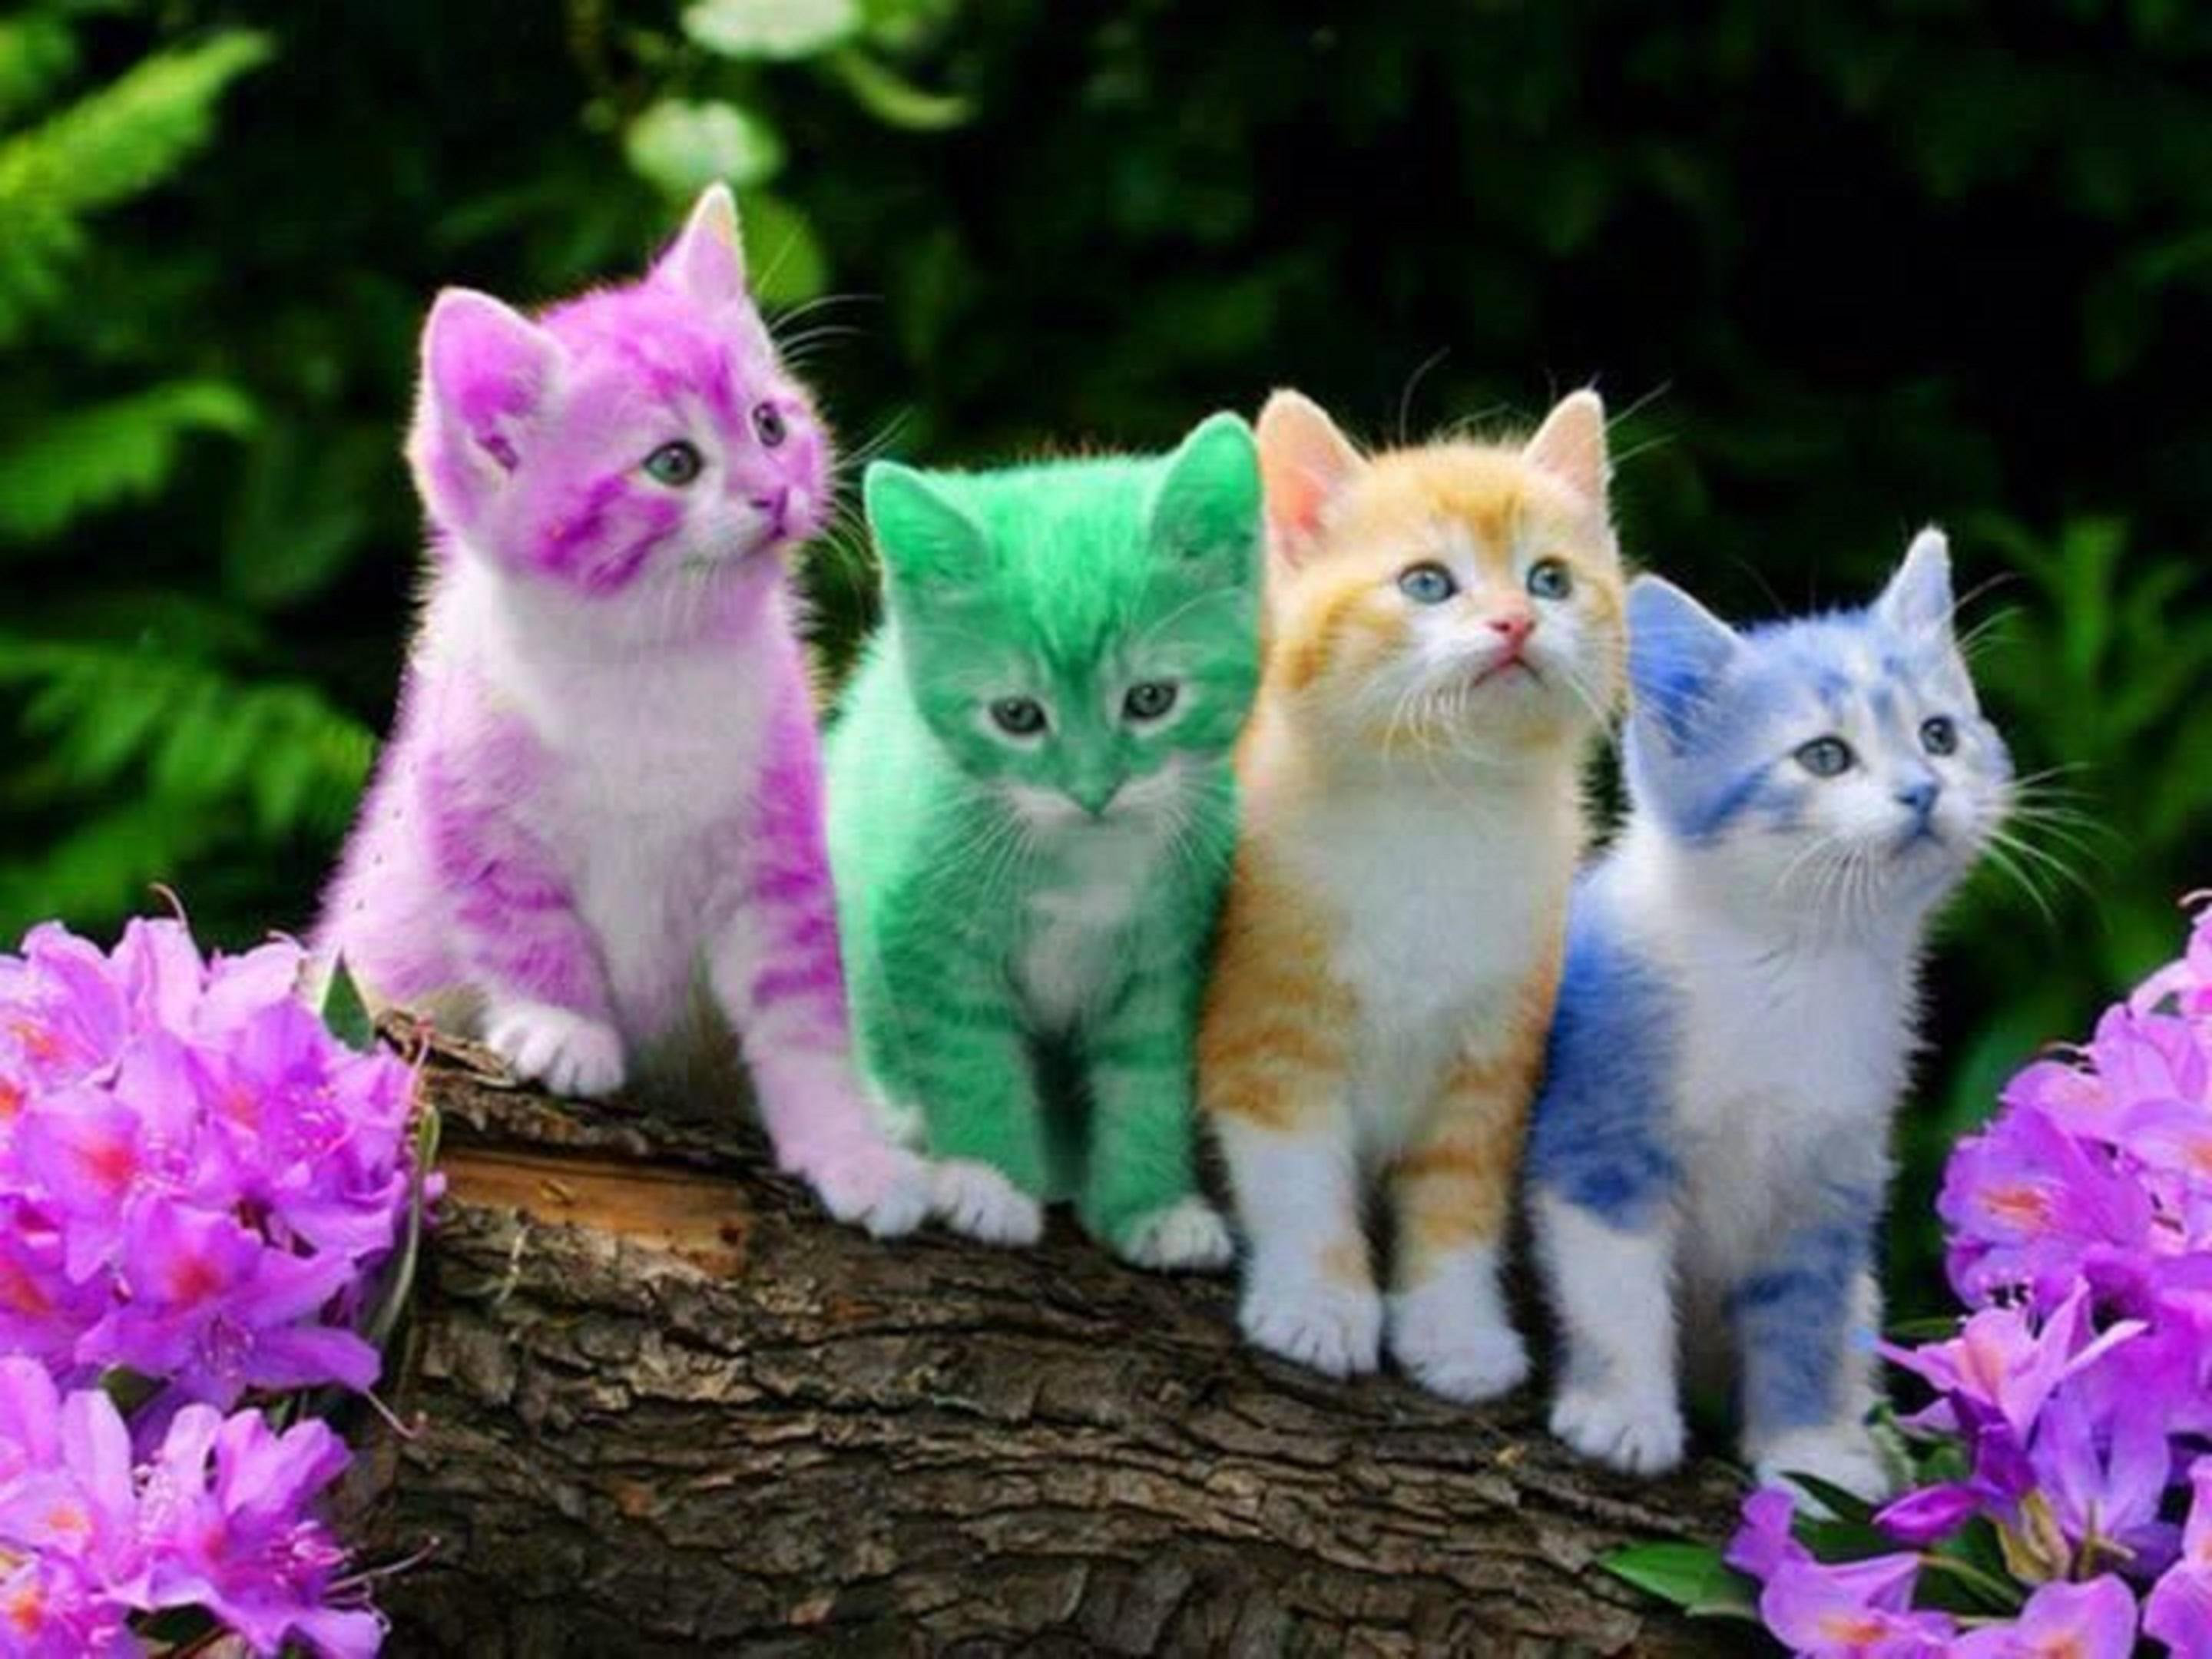

In [7]:
# Preprocess the image
import urllib.request

from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image

import IPython.display as display
from PIL import Image

url = 'https://dslv9ilpbe7p1.cloudfront.net/Hwke7DuwYPAVLOmeLzncYw_store_banner_image.jpeg'

urllib.request.urlretrieve(url, "cats.jpeg")
display.display(Image.open("cats.jpeg"))


In [8]:
img = image.load_img("cats.jpeg", target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print(img.size)
print(image.img_to_array(img).shape)

(224, 224)
(224, 224, 3)



 f1.shape: (1, 224, 224, 3)


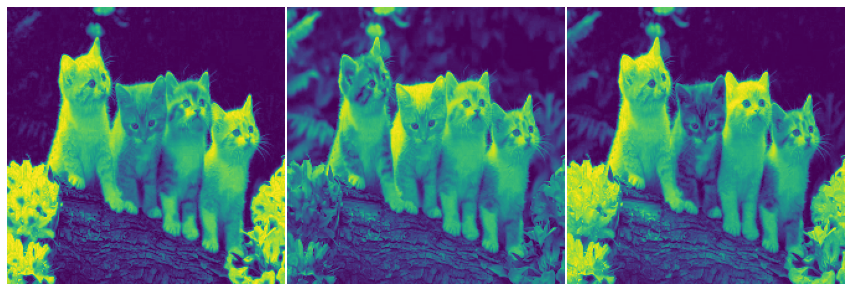

In [9]:
# Extract the features
features_cool_cat = features(x)


# Visualise the input channels

f1 = features_cool_cat[0]
print('\n f1.shape:', f1.shape)
img = f1[0,:,:,:]

plt.figure(figsize=(15,15))

for n in range(3):
    plt.subplot(1,3,n+1)
    plt.imshow(img[:,:,n])
    plt.axis('off')
    
plt.subplots_adjust(hspace=0.01, wspace=0.01)


 f2.shape: (1, 224, 224, 64)


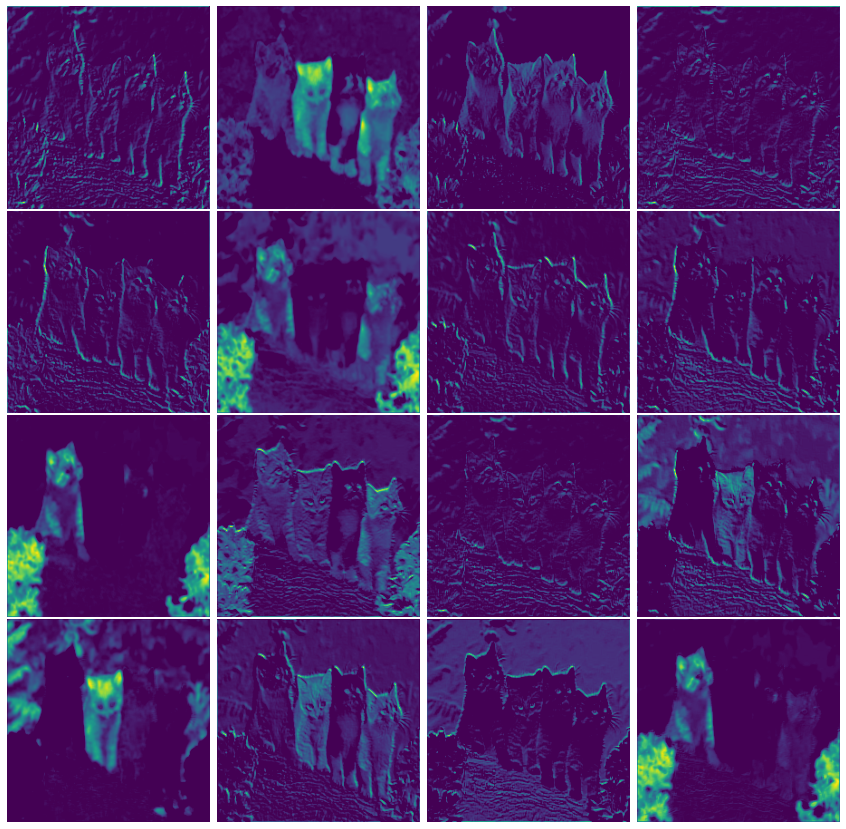

In [11]:
# Visualise some features in the first hidden layer

f2 = features_cool_cat[1]
print('\n f2.shape:', f2.shape)
img = f2[0,:,:,:]

plt.figure(figsize=(15,15))

for n in range(16):
    plt.subplot(4,4,n+1)
    plt.imshow(img[:,:,n])
    plt.axis('off')
    
plt.subplots_adjust(hspace=0.01, wspace=0.01)

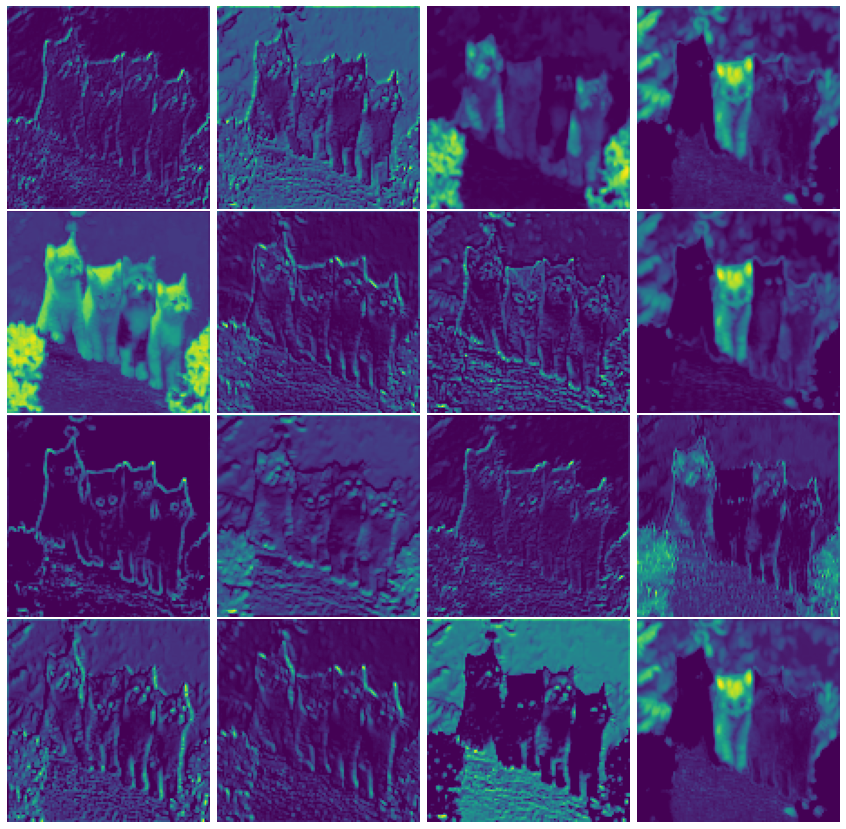

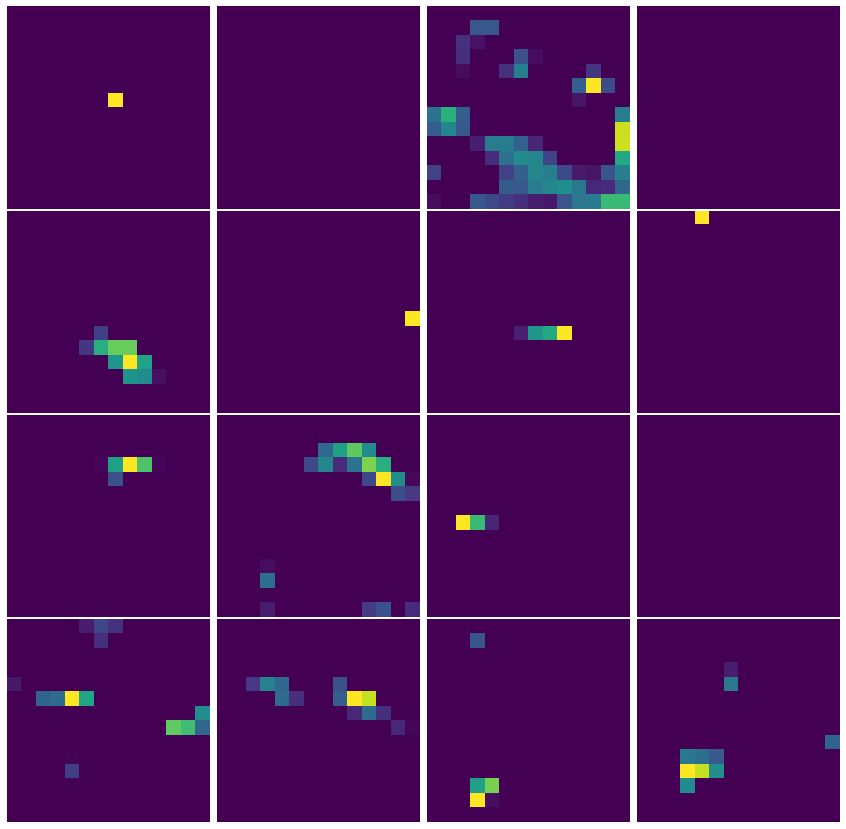

In [15]:
# Build a model to extract features by layer name

model_upto_block1_pool = Model(inputs=features.input, outputs=features.get_layer('block1_pool').output)
block1_pool_cat_features = model_upto_block1_pool(x)


# Visualise some features from the extracted layer output
img = block1_pool_cat_features[0,:,:,:]

plt.figure(figsize=(15,15))

for n in range(16):
    plt.subplot(4,4,n+1)
    plt.imshow(img[:,:,n])
    plt.axis('off')
    
plt.subplots_adjust(hspace=0.01, wspace=0.01)

# Extract features from a layer deeper in the network
model_upto_block5_conv3 = Model(inputs=features.input, outputs=features.get_layer('block5_conv3').output)
block5_pool_cat_features = model_upto_block5_conv3(x)


# Visualise some features from the extracted layer output

img = block5_pool_cat_features[0,:,:,:]

plt.figure(figsize=(15,15))

for n in range(16):
    plt.subplot(4,4,n+1)
    plt.imshow(img[:,:,n])
    plt.axis('off')
    
plt.subplots_adjust(hspace=0.01, wspace=0.01)

# Freezing layers

In [16]:
# Build a small Sequential model

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential([
    layers.Dense(4, input_shape=(4,), activation='relu', kernel_initializer='random_uniform',
                 bias_initializer='ones'),
    layers.Dense(2, activation='relu', kernel_initializer='lecun_normal', bias_initializer='ones'),
    layers.Dense(4, activation='softmax'),
])


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 12        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [18]:
print(model.layers[0].weights[0].numpy())
print(model.layers[0].bias)

[[ 0.04591672 -0.02187301  0.0410671   0.0469063 ]
 [-0.03496913  0.03129679 -0.02071129 -0.04984638]
 [ 0.00744732 -0.04394021 -0.02999072 -0.0261683 ]
 [-0.03199377  0.00235853  0.0478624  -0.04194797]]
<tf.Variable 'dense/bias:0' shape=(4,) dtype=float32, numpy=array([1., 1., 1., 1.], dtype=float32)>


In [19]:
# Retrieve the weights and biases
W0_layers = [layer.weights[0].numpy() for layer in model.layers]
b0_layers = [layer.weights[1].numpy() for layer in model.layers]

In [20]:
# Construct a synthetic dataset
x_train = np.random.random((100, 4))
y_train = x_train

x_test = np.random.random((20, 4))
y_test = x_test

In [21]:
# Compile and fit the model
model.compile(optimizer='adam', loss='mse',metrics=['acc'])
model.fit(x_train, y_train, epochs=50, verbose=False);

In [22]:
# Retrieve weights and biases
W1_layers = [layer.weights[0].numpy() for layer in model.layers]
b1_layers = [layer.weights[1].numpy() for layer in model.layers]

Layer 0: bias variation:  0.22691557
Layer 1: bias variation:  0.14308041
Layer 2: bias variation:  0.26413974


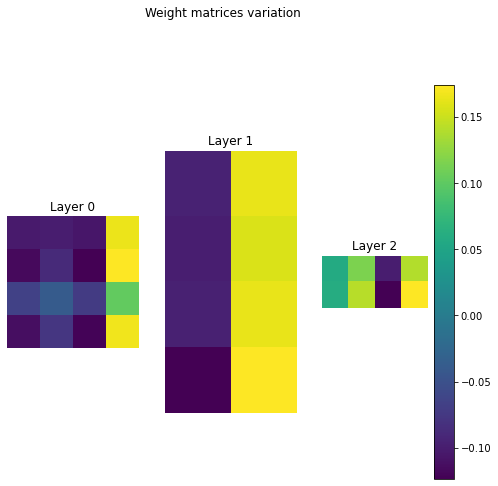

In [23]:
# Plot the variation
plt.figure(figsize=(8,8))
for n in range(3):
    delta_l = W1_layers[n] - W0_layers[n]
    print('Layer '+str(n)+': bias variation: ', np.linalg.norm(b1_layers[n] - b0_layers[n]))
    ax = plt.subplot(1,3,n+1)
    plt.imshow(delta_l)
    plt.title('Layer '+str(n))
    plt.axis('off')
plt.colorbar()
plt.suptitle('Weight matrices variation');

In [24]:
# Count the trainable and non trainable variables before the freezing
n_trainable_variables = len(model.trainable_variables)
n_non_trainable_variables = len(model.non_trainable_variables)

In [25]:
# Display the number of trainable and non trainable variables before the freezing

print("\n Before freezing:\n\t Number of trainable variables: ", n_trainable_variables,
                         "\n\t Number of non trainable variables: ", n_non_trainable_variables)

# Build the model
model = Sequential([
    layers.Dense(4, input_shape=(4,), activation='relu', kernel_initializer='random_uniform',
                 bias_initializer='ones', trainable=False),
    layers.Dense(2, activation='relu', kernel_initializer='lecun_normal', bias_initializer='ones'),
    layers.Dense(4, activation='softmax'),
])


 Before freezing:
	 Number of trainable variables:  6 
	 Number of non trainable variables:  0


In [26]:
# Count the trainable and non trainable variables after the freezing
n_trainable_variables = len(model.trainable_variables)
n_non_trainable_variables = len(model.non_trainable_variables)

# Display the number of trainable and non trainable variables after the freezing

print("\n After freezing:\n\t Number of trainable variables: ", n_trainable_variables,
                         "\n\t Number of non trainable variables: ", n_non_trainable_variables)


 After freezing:
	 Number of trainable variables:  4 
	 Number of non trainable variables:  2


In [27]:
# Retrieve weights and biases
W0_layers = [layer.weights[0].numpy() for layer in model.layers]
b0_layers = [layer.weights[1].numpy() for layer in model.layers]


# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

# Retrieve weights and biases

W1_layers = [layer.weights[0].numpy() for layer in model.layers]
b1_layers = [layer.weights[1].numpy() for layer in model.layers]

Layer 0: bias variation:  0.0
Layer 1: bias variation:  0.16010384
Layer 2: bias variation:  0.3173341


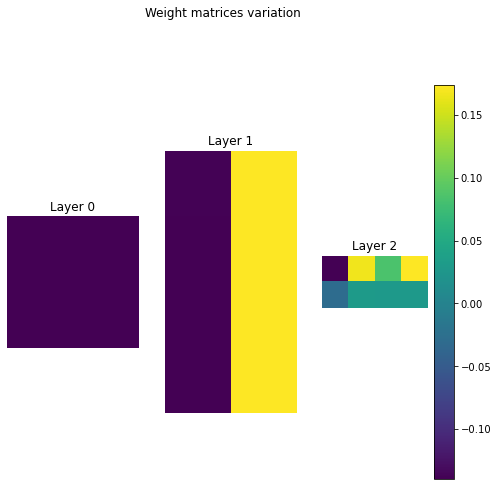

In [28]:
# Plot the variation
plt.figure(figsize=(8,8))
for n in range(3):
    delta_l = W1_layers[n] - W0_layers[n]
    print('Layer '+str(n)+': bias variation: ', np.linalg.norm(b1_layers[n] - b0_layers[n]))
    ax = plt.subplot(1,3,n+1)
    plt.imshow(delta_l)
    plt.title('Layer '+str(n))
    plt.axis('off')
plt.colorbar()
plt.suptitle('Weight matrices variation');

In [29]:
# Count the trainable and non trainable variables before the freezing
print("\n Before freezing:\n\t Number of trainable variables: ", len(model.trainable_variables),
                         "\n\t Number of non trainable variables: ", len(model.non_trainable_variables))


 Before freezing:
	 Number of trainable variables:  4 
	 Number of non trainable variables:  2


In [30]:
# Freeze the second layer
model.layers[1].trainable = False

# Count the trainable and non trainable variables after the freezing

print("\n After freezing:\n\t Number of trainable variables: ", len(model.trainable_variables),
                        "\n\t Number of non trainable variables: ", len(model.non_trainable_variables))


 After freezing:
	 Number of trainable variables:  2 
	 Number of non trainable variables:  4


In [31]:
# Retrieve weights and biases
W2_layers = [layer.weights[0].numpy() for layer in model.layers]
b2_layers = [layer.weights[1].numpy() for layer in model.layers]

Layer 0: bias variation:  0.0
Layer 1: bias variation:  0.0
Layer 2: bias variation:  0.0


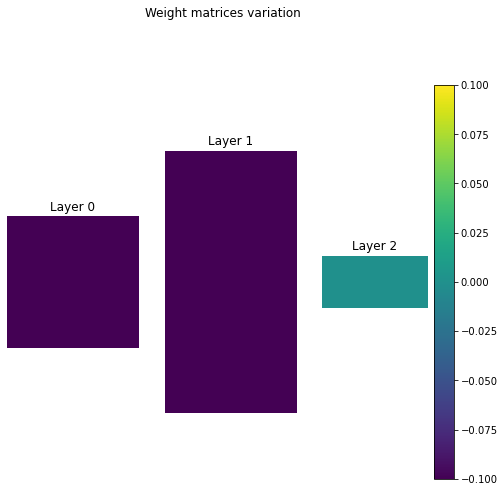

In [32]:
# Plot the variation
plt.figure(figsize=(8,8))
for n in range(3):
    delta_l = W2_layers[n] - W1_layers[n]
    print('Layer '+str(n)+': bias variation: ', np.linalg.norm(b2_layers[n] - b1_layers[n]))
    ax = plt.subplot(1,3,n+1)
    plt.imshow(delta_l)
    plt.title('Layer '+str(n))
    plt.axis('off')
plt.colorbar()
plt.suptitle('Weight matrices variation');